#Pandas

##What is Pandas?
A Python library providing data structures and data analysis tools.

##Why
- Alternative to Excel or R
- Based on Data Frames (think of it like a table) and Series (single column table / time series)

##Learning Pandas
* Almost anything you want to do is already a built-in function in Pandas.
* Before you decide to write a function to do some kind of operation on a Pandas object, scour the Pandas docs and StackOverflow
* http://pandas.pydata.org/pandas-docs/stable/index.html

#Objectives

- Create/Understand Series objects
- Create/Understand DataFrame objects
- Create and destroy new columns, apply functions to rows and columns
- Join/Merge Dataframes
- Use DataFrame grouping and aggregation
- Perform high-level EDA using Pandas

### Standard Imports

In [1]:
# By convention import pandas like:
import pandas as pd
import numpy as np

# For fake data.
from numpy.random import randn

#Series

Think of a Pandas Series as a _labeled_ one-dimensional vector. In fact, it need not be a numeric vector, it can contain arbitrary python objects.

Integer valued series:

In [2]:
pd.Series(range(10))

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

Real valued series:

In [3]:
pd.Series(randn(10))

0    0.764987
1   -0.617611
2    0.683543
3   -1.419724
4    0.647923
5   -1.569445
6   -0.126259
7    0.148824
8    1.115888
9   -2.830467
dtype: float64

String valued series:

In [4]:
pd.Series(list('abcde')*2)

0    a
1    b
2    c
3    d
4    e
5    a
6    b
7    c
8    d
9    e
dtype: object

#Indexes.

Notice how each series has an index (in this case a relatively meaningless default index). Pandas can make great use of informative indexes. Indexes work similarly to a dictionary key, allowing fast lookups of the data associated with the index---which helps optimize many operations.

In [5]:
# Sample index - each data point is labelled with a state.
index1 = ['California', 'Alabama', 'Indiana', 'Montana', 'Kentucky']
index2 = ['Washington', 'Alabama', 'Montana', 'Indiana', 'New York']

Labelled numeric series:

In [6]:
series1 = pd.Series(randn(5), index=index1)
series2 = pd.Series(randn(5), index=index2)
print series1, '\n'*2, series2

California    1.564657
Alabama       0.230350
Indiana      -1.519493
Montana       0.258418
Kentucky     -0.024684
dtype: float64 

Washington    0.470664
Alabama       0.267329
Montana       1.600380
Indiana       0.768354
New York      0.855144
dtype: float64


The index is used to line up arithmetic operations.

In [7]:
series1 * series2

Alabama       0.061579
California         NaN
Indiana      -1.167509
Kentucky           NaN
Montana       0.413567
New York           NaN
Washington         NaN
dtype: float64

Aggregation by index labels is easy (and optimized)

In [8]:
long_index = index1*3
long_series = pd.Series(randn(15), index=long_index)
print long_series, '\n'

California   -1.410658
Alabama       2.651500
Indiana       1.078986
Montana      -0.206235
Kentucky     -0.869763
California   -0.090226
Alabama      -0.051525
Indiana      -0.139689
Montana      -0.023936
Kentucky     -1.166736
California   -0.238118
Alabama       1.169698
Indiana      -1.087605
Montana       0.309177
Kentucky      2.092338
dtype: float64 



In [9]:
long_series.groupby(level=0).mean()

Alabama       1.256558
California   -0.579667
Indiana      -0.049436
Kentucky      0.018613
Montana       0.026335
dtype: float64

Create a series indexed by dates

In [10]:
dt_index = pd.date_range(start='2015-01-01', end='2015-02-01', freq='D')
dt_series = pd.Series(randn(len(dt_index)), index=dt_index)
dt_series

2015-01-01   -0.690711
2015-01-02   -0.832864
2015-01-03   -1.240787
2015-01-04   -0.008178
2015-01-05   -1.319798
2015-01-06   -0.193080
2015-01-07    0.405839
2015-01-08   -1.986234
2015-01-09    0.328452
2015-01-10    0.774404
2015-01-11    0.100129
2015-01-12    1.151297
2015-01-13    0.606342
2015-01-14   -0.546962
2015-01-15   -1.206696
2015-01-16   -0.368595
2015-01-17   -0.190507
2015-01-18    0.316938
2015-01-19    0.150055
2015-01-20   -0.045151
2015-01-21   -0.243772
2015-01-22    1.185924
2015-01-23    0.773184
2015-01-24   -0.196221
2015-01-25    1.097641
2015-01-26    0.005094
2015-01-27   -0.604073
2015-01-28    2.677502
2015-01-29   -1.163587
2015-01-30    1.266346
2015-01-31   -0.333391
2015-02-01   -0.205858
Freq: D, dtype: float64

Closer look at the index values

Resample by week

In [11]:
dt_series.resample('W', how='max')

2015-01-04   -0.008178
2015-01-11    0.774404
2015-01-18    1.151297
2015-01-25    1.185924
2015-02-01    2.677502
Freq: W-SUN, dtype: float64

#DataFrames
Data frames extend the concept of Series to table-like data.

From a dictionary of series or list

In [12]:
s1 = pd.Series(randn(10))
s2 = randn(10)
pd.DataFrame({'Col1': s1.values, 'Col2': s2}, index=dt_index[:10])

,Col1,Col2
2015-01-01,-0.537032,-0.487151
2015-01-02,-1.218708,0.239496
2015-01-03,1.634686,-1.154456
2015-01-04,-0.703407,-0.854088
2015-01-05,-0.305351,1.804358
2015-01-06,1.778182,-0.671661
2015-01-07,-0.752774,-0.099576
2015-01-08,0.925326,1.425145
2015-01-09,-0.386524,0.922920
2015-01-10,0.953676,-0.182699


From a numpy array

In [13]:
df = pd.DataFrame(randn(10, 5), index=dt_index[:10], columns=list('abcde'))
df

,a,b,c,d,e
2015-01-01,-0.596306,2.380832,0.149078,1.583246,0.372374
2015-01-02,0.383702,0.278624,0.210314,0.438903,-0.866517
2015-01-03,-0.618270,0.491489,0.446514,1.905647,-0.499387
2015-01-04,-0.099399,-0.807988,-0.937166,0.677931,-0.427308
2015-01-05,1.003214,-0.611949,1.787462,0.536115,0.649852
2015-01-06,-0.201443,0.180215,-1.352948,-1.663234,-0.340774
2015-01-07,-0.596544,0.342770,1.423677,-0.616458,-0.392198
2015-01-08,0.406317,-0.008098,0.438180,1.234362,0.438125
2015-01-09,1.744005,-0.697998,1.473957,-1.045907,-1.528174
2015-01-10,-0.544297,-0.342729,2.704811,0.821763,-0.687897


Dataframes can be indexed (selected) by label, numeric index (avoid if possible), and boolean.

In [14]:
print df[['a', 'b']]

                   a         b
2015-01-01 -0.596306  2.380832
2015-01-02  0.383702  0.278624
2015-01-03 -0.618270  0.491489
2015-01-04 -0.099399 -0.807988
2015-01-05  1.003214 -0.611949
2015-01-06 -0.201443  0.180215
2015-01-07 -0.596544  0.342770
2015-01-08  0.406317 -0.008098
2015-01-09  1.744005 -0.697998
2015-01-10 -0.544297 -0.342729


In [15]:
print df.ix['2015-01-01':'2015-01-05', :2]

                   a         b
2015-01-01 -0.596306  2.380832
2015-01-02  0.383702  0.278624
2015-01-03 -0.618270  0.491489
2015-01-04 -0.099399 -0.807988
2015-01-05  1.003214 -0.611949


In [16]:
print df[df.a > 0]

                   a         b         c         d         e
2015-01-02  0.383702  0.278624  0.210314  0.438903 -0.866517
2015-01-05  1.003214 -0.611949  1.787462  0.536115  0.649852
2015-01-08  0.406317 -0.008098  0.438180  1.234362  0.438125
2015-01-09  1.744005 -0.697998  1.473957 -1.045907 -1.528174


In [17]:
# Each column is a series
print df.a, '\n'
print type(df.a)

2015-01-01   -0.596306
2015-01-02    0.383702
2015-01-03   -0.618270
2015-01-04   -0.099399
2015-01-05    1.003214
2015-01-06   -0.201443
2015-01-07   -0.596544
2015-01-08    0.406317
2015-01-09    1.744005
2015-01-10   -0.544297
Freq: D, Name: a, dtype: float64 

<class 'pandas.core.series.Series'>


In [18]:
# So are the rows.
print df.ix['2015-01-01'], '\n'
print type(df.ix['2015-01-01'])

a   -0.596306
b    2.380832
c    0.149078
d    1.583246
e    0.372374
Name: 2015-01-01 00:00:00, dtype: float64 

<class 'pandas.core.series.Series'>


In [19]:
#The columns all have the same index:
print df.a.index, '\n'
print type(df.a.index)

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10'],
              dtype='datetime64[ns]', freq='D', tz=None) 

<class 'pandas.tseries.index.DatetimeIndex'>


In [20]:
#What's the index for the rows?
print df.ix['2015-01-01'].index, '\n'
print type(df.ix['2015-01-01'].index)

Index([u'a', u'b', u'c', u'd', u'e'], dtype='object') 

<class 'pandas.core.index.Index'>


#DataFrame basics

Load data from a delimited file.

In [21]:
df = pd.read_csv('../data/playgolf.csv', sep='|')
df

,Date,Outlook,Temperature,Humidity,Windy,Result
0,07-01-2014,sunny,85,85,False,Don't Play
1,07-02-2014,sunny,80,90,True,Don't Play
2,07-03-2014,overcast,83,78,False,Play
3,07-04-2014,rain,70,96,False,Play
4,07-05-2014,rain,68,80,False,Play
5,07-06-2014,rain,65,70,True,Don't Play
6,07-07-2014,overcast,64,65,True,Play
7,07-08-2014,sunny,72,95,False,Don't Play
8,07-09-2014,sunny,69,70,False,Play
9,07-10-2014,rain,75,80,False,Play


Create a new column.

In [22]:
df['new'] = df['Temperature'] + df['Humidity']
df

,Date,Outlook,Temperature,Humidity,Windy,Result,new
0,07-01-2014,sunny,85,85,False,Don't Play,170
1,07-02-2014,sunny,80,90,True,Don't Play,170
2,07-03-2014,overcast,83,78,False,Play,161
3,07-04-2014,rain,70,96,False,Play,166
4,07-05-2014,rain,68,80,False,Play,148
5,07-06-2014,rain,65,70,True,Don't Play,135
6,07-07-2014,overcast,64,65,True,Play,129
7,07-08-2014,sunny,72,95,False,Don't Play,167
8,07-09-2014,sunny,69,70,False,Play,139
9,07-10-2014,rain,75,80,False,Play,155


Drop a column

In [23]:
df = df.drop('new', axis=1)
df

,Date,Outlook,Temperature,Humidity,Windy,Result
0,07-01-2014,sunny,85,85,False,Don't Play
1,07-02-2014,sunny,80,90,True,Don't Play
2,07-03-2014,overcast,83,78,False,Play
3,07-04-2014,rain,70,96,False,Play
4,07-05-2014,rain,68,80,False,Play
5,07-06-2014,rain,65,70,True,Don't Play
6,07-07-2014,overcast,64,65,True,Play
7,07-08-2014,sunny,72,95,False,Don't Play
8,07-09-2014,sunny,69,70,False,Play
9,07-10-2014,rain,75,80,False,Play


Delete a row

In [24]:
df = df.drop(13, axis=0)
df

,Date,Outlook,Temperature,Humidity,Windy,Result
0,07-01-2014,sunny,85,85,False,Don't Play
1,07-02-2014,sunny,80,90,True,Don't Play
2,07-03-2014,overcast,83,78,False,Play
3,07-04-2014,rain,70,96,False,Play
4,07-05-2014,rain,68,80,False,Play
5,07-06-2014,rain,65,70,True,Don't Play
6,07-07-2014,overcast,64,65,True,Play
7,07-08-2014,sunny,72,95,False,Don't Play
8,07-09-2014,sunny,69,70,False,Play
9,07-10-2014,rain,75,80,False,Play


Add a row

In [25]:
new_row = pd.DataFrame([['07-14-2014', 'foggy', 62, 90, False, 'Play']], index=[13], columns=df.columns)
pd.concat([df, new_row])

,Date,Outlook,Temperature,Humidity,Windy,Result
0,07-01-2014,sunny,85,85,False,Don't Play
1,07-02-2014,sunny,80,90,True,Don't Play
2,07-03-2014,overcast,83,78,False,Play
3,07-04-2014,rain,70,96,False,Play
4,07-05-2014,rain,68,80,False,Play
5,07-06-2014,rain,65,70,True,Don't Play
6,07-07-2014,overcast,64,65,True,Play
7,07-08-2014,sunny,72,95,False,Don't Play
8,07-09-2014,sunny,69,70,False,Play
9,07-10-2014,rain,75,80,False,Play


#Applying functions

Using existing functions

In [26]:
df.mean()

Temperature    73.769231
Humidity       80.307692
Windy           0.384615
dtype: float64

Creating and using an arbitrary function

In [27]:
square_num = lambda x: x**2
df.Temperature.apply(square_num)

0     7225
1     6400
2     6889
3     4900
4     4624
5     4225
6     4096
7     5184
8     4761
9     5625
10    5625
11    5184
12    6561
Name: Temperature, dtype: int64

Using multiple values on each row

In [28]:
multiply = lambda x, y: x*y
df.apply(lambda x: multiply(x.Temperature, x.Humidity), axis=1)

0     7225
1     7200
2     6474
3     6720
4     5440
5     4550
6     4160
7     6840
8     4830
9     6000
10    5250
11    6480
12    6075
dtype: int64

#Summarizing dataframe

In [29]:
df.describe()

,Temperature,Humidity,Windy
count,13.000000,13.000000,13
mean,73.769231,80.307692,0.3846154
std,6.796492,10.241945,0.5063697
min,64.000000,65.000000,False
25%,69.000000,70.000000,0
50%,72.000000,80.000000,0
75%,80.000000,90.000000,1
max,85.000000,96.000000,True


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 0 to 12
Data columns (total 6 columns):
Date           13 non-null object
Outlook        13 non-null object
Temperature    13 non-null int64
Humidity       13 non-null int64
Windy          13 non-null bool
Result         13 non-null object
dtypes: bool(1), int64(2), object(3)
memory usage: 637.0+ bytes


#Index manipulation

Set index

In [31]:
df = df.set_index(['Date'])
df

,Outlook,Temperature,Humidity,Windy,Result
Date,,,,,
07-01-2014,sunny,85,85,False,Don't Play
07-02-2014,sunny,80,90,True,Don't Play
07-03-2014,overcast,83,78,False,Play
07-04-2014,rain,70,96,False,Play
07-05-2014,rain,68,80,False,Play
07-06-2014,rain,65,70,True,Don't Play
07-07-2014,overcast,64,65,True,Play
07-08-2014,sunny,72,95,False,Don't Play
07-09-2014,sunny,69,70,False,Play


Reset index

In [32]:
df = df.reset_index()
df

,Date,Outlook,Temperature,Humidity,Windy,Result
0,07-01-2014,sunny,85,85,False,Don't Play
1,07-02-2014,sunny,80,90,True,Don't Play
2,07-03-2014,overcast,83,78,False,Play
3,07-04-2014,rain,70,96,False,Play
4,07-05-2014,rain,68,80,False,Play
5,07-06-2014,rain,65,70,True,Don't Play
6,07-07-2014,overcast,64,65,True,Play
7,07-08-2014,sunny,72,95,False,Don't Play
8,07-09-2014,sunny,69,70,False,Play
9,07-10-2014,rain,75,80,False,Play


#Grouping (split-apply-combine)

Get averages for each outlook

In [33]:
df.groupby('Outlook').mean()

,Temperature,Humidity,Windy
Outlook,,,
overcast,75.0,77.0,0.50
rain,69.5,81.5,0.25
sunny,76.2,82.0,0.40


Initialize a groupby object---and iterate through the groupings

In [34]:
grouped = df.groupby(['Windy', 'Result'])

for name, group in grouped:
    print name
    print group 
    print '\n'

(False, "Don't Play")
         Date Outlook  Temperature  Humidity  Windy      Result
0  07-01-2014   sunny           85        85  False  Don't Play
7  07-08-2014   sunny           72        95  False  Don't Play


(False, 'Play')
          Date   Outlook  Temperature  Humidity  Windy Result
2   07-03-2014  overcast           83        78  False   Play
3   07-04-2014      rain           70        96  False   Play
4   07-05-2014      rain           68        80  False   Play
8   07-09-2014     sunny           69        70  False   Play
9   07-10-2014      rain           75        80  False   Play
12  07-13-2014  overcast           81        75  False   Play


(True, "Don't Play")
         Date Outlook  Temperature  Humidity Windy      Result
1  07-02-2014   sunny           80        90  True  Don't Play
5  07-06-2014    rain           65        70  True  Don't Play


(True, 'Play')
          Date   Outlook  Temperature  Humidity Windy Result
6   07-07-2014  overcast           64       

Get the mean for each group

In [35]:
grouped.aggregate(np.mean)

Temperature   Humidity
Windy Result                            
False Don't Play    78.500000  90.000000
      Play          74.333333  79.833333
True  Don't Play    72.500000  80.000000
      Play          70.333333  75.000000

Normalize by the group each date belonged in

In [36]:
grouped.transform(lambda x: (x - x.mean()) / x.std())

,Temperature,Humidity
0,0.707107,-0.707107
1,0.707107,0.707107
2,1.345868,-0.208973
3,-0.672934,1.842762
4,-0.983519,0.018998
5,-0.707107,-0.707107
6,-1.113800,-0.755929
7,-0.707107,0.707107
8,-0.828227,-1.120855
9,0.103528,0.018998


Summarize by each group

In [37]:
grouped.apply(lambda x: x.describe()).T

Windy            False                                                    \
Result      Don't Play                                                     
                 count  mean       std    min    25%   50%    75%    max   
Temperature          2  78.5  9.192388     72  75.25  78.5  81.75     85   
Humidity             2    90  7.071068     85   87.5    90   92.5     95   
Windy                2     0         0  False      0     0      0  False   

Windy                        ...       True                                   \
Result       Play            ...  Don't Play        Play                       
            count      mean  ...         75%   max count      mean       std   
Temperature     6  74.33333  ...       76.25    80     3  70.33333  5.686241   
Humidity        6  79.83333  ...          85    90     3        75  13.22876   
Windy           6         0  ...           1  True     3         1         0   

Windy                                    
Result                                   
              min   25% 50%   75%   max  
Temperature    64    68  72  73.5    75  
Humidity       65  67.5  70    80    90  
Windy        True     1   1     1  True  

[3 rows x 32 columns]

#Cross Comparison

In [38]:
pd.crosstab(df.Outlook, df.Result)

Result,Don't Play,Play
Outlook,,
overcast,0,4
rain,1,3
sunny,3,2


#Charting

In [39]:
#this enables charts to show inside iPython Notebook
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x107631550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x107766090>]], dtype=object)

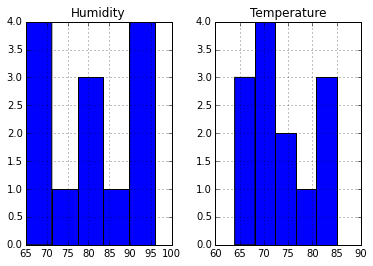

In [40]:
df[['Humidity', 'Temperature']].hist(bins=5)

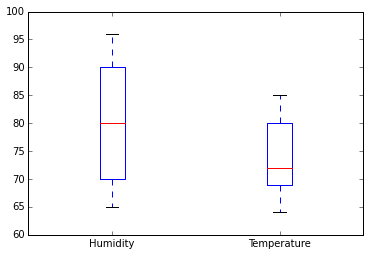

In [41]:
df[['Humidity', 'Temperature']].plot(kind='box')

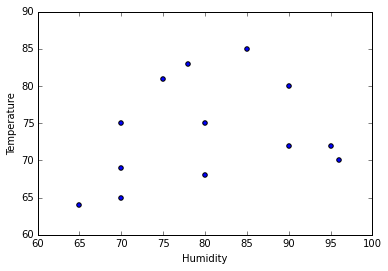

In [42]:
df.plot('Humidity', 'Temperature', kind='scatter')

#Using pandas with sql

In [43]:
import psycopg2 as pg2

In [44]:
conn = pg2.connect(dbname='test', user='minghuang', host = 'localhost')

In [45]:
query = '''
        SELECT *
        FROM logins
        LIMIT 30;
        '''
pd.read_sql(query, conn).head()

,userid,tmstmp,type
0,579,2013-11-20 03:20:06,mobile
1,823,2013-11-20 03:20:49,web
2,953,2013-11-20 03:28:49,web
3,612,2013-11-20 03:36:55,web
4,269,2013-11-20 03:43:13,web


In [46]:
conn.close()

#We're done with the Pandas tutorial, but.....

here are some examples showing how to redo the SQL assignment in Pandas, plus Exploratory Data Analysis using Pandas using the stuffs you just learnt (hopefully).

#ReadyChef
[Data](https://www.dropbox.com/sh/5sm9nvnh6b4m8d0/AABQyediVavAdsjnoEUBEyYCa?dl=0)

Download, unzip and place the readychef directory in pandas-tutorial/data

In [48]:
meals = pd.read_csv('../data/readychef/meals.csv')
events = pd.read_csv('../data/readychef/events.csv')
referrals = pd.read_csv('../data/readychef/referrals.csv')
users = pd.read_csv('../data/readychef/users.csv')
visits = pd.read_csv('../data/readychef/visits.csv')

Select statements
===================

1. To get an understanding of the data, run a [SELECT](http://www.postgresqltutorial.com/postgresql-select/) statement on each table. Keep all the columns and limit the number of rows to 10.

2. Write a `SELECT` statement that would get just the userids.

3. Maybe you're just interested in what the campaign ids are. Use 'SELECT DISTINCT' to figure out all the possible values of that column.

    *Note:*  Pinterest=PI, Facebook=FB, Twitter=TW, and Reddit=RE

In [49]:
#3
users.campaign_id.unique()
users.campaign_id.value_counts()

FB    2192
TW    1882
RE     862
PI     588
dtype: int64

Where Clauses / Filtering
========================================

Now that we have the lay of the land, we're interested in the subset of users that came from Facebook (FB). If you're unfamiliar with SQL syntax, the [WHERE](http://www.postgresqltutorial.com/postgresql-where/) clause can be used to add a conditional to `SELECT` statements. This has the effect of only returning rows where the conditional evaluates to `TRUE`. 

*Note: Make sure you put string literals in single quotes, like `campaign_id='TW'`.*

1. Using the `WHERE` clause, write a new `SELECT` statement that returns all rows where `Campaign_ID` is equal to `FB`.

2. We don't need the campaign id in the result since they are all the same, so only include the other two columns.

    Your output should be something like this:

    ```
     userid |     dt
    --------+------------
          3 | 2013-01-01
          4 | 2013-01-01
          5 | 2013-01-01
          6 | 2013-01-01
          8 | 2013-01-01
    ...
    ```


In [50]:
# can also use users.ix[users.campaign_id=='FB']
users[users['campaign_id']=='FB'][['userid', 'dt']].head(10)

,userid,dt
2,3,2013-01-01
3,4,2013-01-01
4,5,2013-01-01
5,6,2013-01-01
7,8,2013-01-01
8,9,2013-01-01
11,12,2013-01-01
16,17,2013-01-01
18,19,2013-01-01
23,24,2013-01-01


Aggregation Functions
=======================



6. Now get the average price, the min price and the max price for each meal type. Don't forget the group by statement!

    Your output should look like this:

    ```
        type    |         avg         | min | max
    ------------+---------------------+-----+-----
     mexican    |  9.6975945017182131 |   6 |  13
     french     | 11.5420000000000000 |   7 |  16
     japanese   |  9.3804878048780488 |   6 |  13
     italian    | 11.2926136363636364 |   7 |  16
     chinese    |  9.5187165775401070 |   6 |  13
     vietnamese |  9.2830188679245283 |   6 |  13
    (6 rows)
    ```



In [51]:
meals.groupby('type')['price'].aggregate({'avg': np.mean,
                                          'min': np.min,
                                          'max': np.max})

,max,avg,min
type,,,
chinese,13,9.518717,6
french,16,11.542000,7
italian,16,11.292614,7
japanese,13,9.380488,6
mexican,13,9.697595,6
vietnamese,13,9.283019,6


Joins
=========================

Now we are ready to do operations on multiple tables. A [JOIN](http://www.tutorialspoint.com/postgresql/postgresql_using_joins.htm) allows us to combine multiple tables.

1. Write a query to get one table that joins the `events` table with the `users` table (on `userid`) to create the following table.

    ```
     userid | campaign_id | meal_id | event
    --------+-------------+---------+--------
          3 | FB          |      18 | bought
          7 | PI          |       1 | like
         10 | TW          |      29 | bought
         11 | RE          |      19 | share
         15 | RE          |      33 | like
    ...
    ```



In [52]:
events.merge(users, how='inner', left_on='userid', right_on='userid')[['userid', 'meal_id', 'campaign_id']].head(3)

,userid,meal_id,campaign_id
0,3,18,FB
1,3,15,FB
2,3,41,FB


Extra Credit
========================
1. Answer the question, _"What user from each campaign bought the most items?"_

    It will be helpful to create a temporary table that contains the counts of the number of items each user bought. You can create a table like this: `CREATE TABLE mytable AS SELECT...`

In [53]:
# Get a table with user, campaign, and event
comb = users.merge(events, on='userid')[['userid', 'campaign_id', 'event']]
# Get the number of buys for each user/campaign combination
agg = comb.groupby(['userid', 'campaign_id'])['event'].aggregate({'num_buys': lambda x: sum(x=='bought')}).reset_index()
# Add a column of max number of buys per campaign
agg['max_buys'] = agg.groupby('campaign_id')['num_buys'].transform(np.max)
# Find the users with the maximum buys
agg.ix[agg.num_buys == agg.max_buys]

,userid,campaign_id,num_buys,max_buys
27,28,TW,87,87
49,50,FB,89,89
74,75,RE,77,77
128,129,PI,101,101


#Exploratory Data Analysis with Pandas

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
df = pd.read_csv('../data/playgolf.csv', delimiter='|' )
print df.head()

         Date   Outlook  Temperature  Humidity  Windy      Result
0  07-01-2014     sunny           85        85  False  Don't Play
1  07-02-2014     sunny           80        90   True  Don't Play
2  07-03-2014  overcast           83        78  False        Play
3  07-04-2014      rain           70        96  False        Play
4  07-05-2014      rain           68        80  False        Play


#Describe the continuous variables
##This treats the Boolean Windy variable as a series of 0's and 1's

In [57]:
df.describe()

,Temperature,Humidity,Windy
count,14.000000,14.000000,14
mean,73.571429,80.285714,0.4285714
std,6.571667,9.840486,0.5135526
min,64.000000,65.000000,False
25%,69.250000,71.250000,0
50%,72.000000,80.000000,0
75%,78.750000,88.750000,1
max,85.000000,96.000000,True


Can see the general pattern of Temperature and Humidity and mean of a Boolean represents the percentage

##We can make use of df.plot() to produce simple graphs that calls on the more adjustable Matplotlib library 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x108378150>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1029965d0>]], dtype=object)

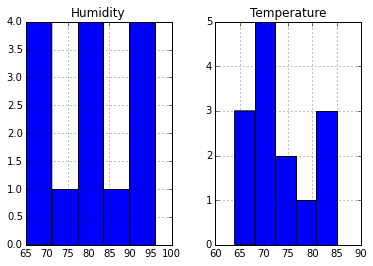

In [58]:
# Side-by-side histograms
df[['Humidity', 'Temperature']].hist(bins=5)

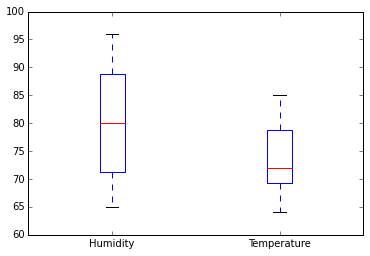

In [59]:
# Box plot
df[['Humidity', 'Temperature']].plot(kind='box')

###Scatterplots for examining bivariate relationships (kind=scatter)

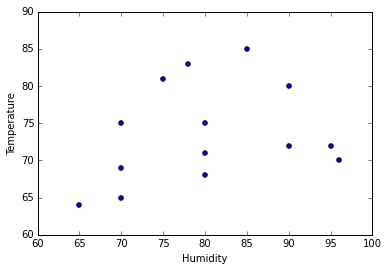

In [60]:
df.plot('Humidity', 'Temperature', kind='scatter')

###If we want to color the scatterplots according to a category, it requires a bit of matplotlib...ugh!

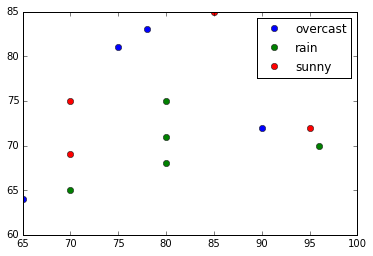

In [61]:
grouped = df.groupby('Outlook')
for name, group in grouped:
    plt.plot(group.Humidity, group.Temperature, label=name, marker='o', linestyle='')
plt.legend(numpoints=1)
plt.show()

#What about the categorical variables? Frequency tables and relative frequency tables

###Simply df.value_counts() gets you the frequencies

In [62]:
df.Outlook.value_counts()

rain        5
sunny       5
overcast    4
dtype: int64

###Using apply will get you the value counts for multiple columns at once

In [63]:
df.head()

,Date,Outlook,Temperature,Humidity,Windy,Result
0,07-01-2014,sunny,85,85,False,Don't Play
1,07-02-2014,sunny,80,90,True,Don't Play
2,07-03-2014,overcast,83,78,False,Play
3,07-04-2014,rain,70,96,False,Play
4,07-05-2014,rain,68,80,False,Play


###Contingency Tables for looking at bivariate relationships between two categorical variables (pd.crosstab)

In [64]:
pd.crosstab(df.Outlook, df.Result)

Result,Don't Play,Play
Outlook,,
overcast,0,4
rain,2,3
sunny,3,2


###Often we want the row percentages

In [65]:
pd.crosstab(df.Outlook, df.Result).apply(lambda x: x/x.sum(), axis=0)

Result,Don't Play,Play
Outlook,,
overcast,0.0,0.444444
rain,0.4,0.333333
sunny,0.6,0.222222


###Or the column percentages

In [66]:
pd.crosstab(df.Outlook, df.Result).apply(lambda x: x/x.sum(), axis=1)

Result,Don't Play,Play
Outlook,,
overcast,0.0,1.0
rain,0.4,0.6
sunny,0.6,0.4


#Enough...lets get to the pair sprint